In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()




'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import seaborn as sns

/cluster/scratch/bdayan/GIRG_data/socfb-Berkeley13.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Virginia63.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster

In [60]:
n, d, tau, alpha = 10000, 2, 2.4, 1.5

g, edges, weights, pts, const = generation.generate_GIRG_nk(
    n, d, tau, alpha, weights=None, pts=None, desiredAvgDegree=200,
    points_type=points.PointsTorus2)

../benji_girgs/generation.py:140: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


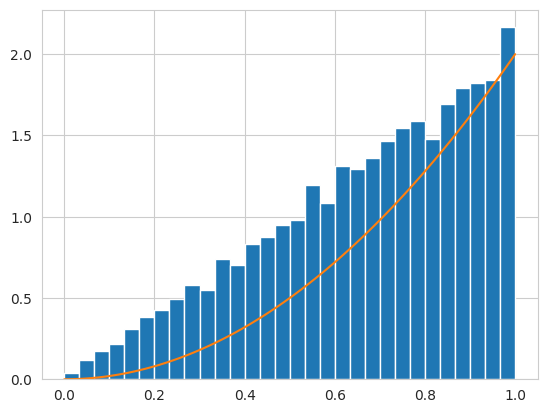

In [62]:
dists = pts[0].dist(pts)
_ = plt.hist(dists, bins=30, density=True)
x = np.linspace(0, 1, 100)
plt.plot(x, 2.0* x**2)

411


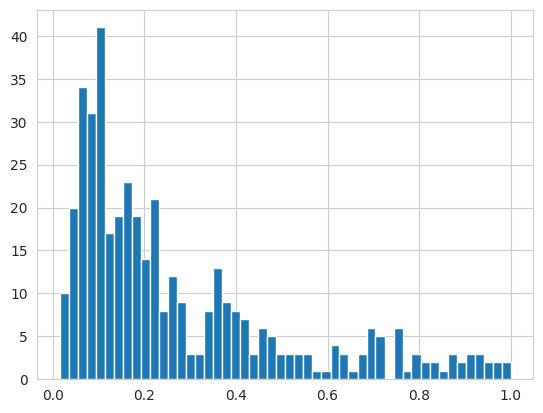

In [66]:
i = 7
print(g.degree(i))
dists = pts[i].dist(pts[list(g.iterNeighbors(i))])
_ = plt.hist(dists, bins=50)

In [63]:
weights[:20]

array([ 1.9093495 ,  2.03666722,  1.08929625,  3.15136599, 98.51393174,
        1.07955198,  1.20566043,  6.4025619 ,  1.08537103,  1.57061636,
        1.28371074,  5.77738868,  1.15383618, 22.17316714,  2.26202434,
        3.25766267,  1.65496752,  1.64933134,  1.87754807,  1.21393985])

In [4]:
n, d, tau, alpha = 4000, 2, 2.1, 1.5

g, edges, weights, pts, const = generation.generate_GIRG_nk(
    n, d, tau, alpha, weights=None, pts=None, desiredAvgDegree=60,
    points_type=points.PointsCube)

a, B, pts = utils.get_diffmap_and_points(g, ds=2, process='restrict_uniform_edges')
pts = points.PointsCube(pts)


MC = mcmc.MCMC_girg(g, weights.copy(), alpha, const, pts.copy(), pool=False, graph_name='test',
                                    failure_prob=0.3, cl_mixin_prob=0.5)

../benji_girgs/generation.py:140: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:153: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(wuwv, dists**d)


In [5]:
%load_ext line_profiler

In [6]:
%lprun -T lprof1 -f MC.ordered_point_propose_compare_update MC.ordered_point_propose_compare_update(3)


*** Profile printout saved to text file 'lprof1'. 


In [7]:
self = MC
u_index = 0

num_proposals=20

x_u = self.pts[u_index].copy()

nhbs = list(self.g.iterNeighbors(u_index))
mean_pos = self.pts[nhbs].mean(axis=0)

x_u2s = np.concatenate([
    # near to current position
    self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=x_u, p_normal=0.7),
    # near to mean position
    self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=mean_pos, p_normal=0.7),
    # near to neighbours
    self.proposal(num_proposals//2, self.d, sigma=0.01,
                  x_u=self.pts[nhbs][np.random.choice(len(nhbs), size=num_proposals//2)],
                  p_normal=0.7),
])

x_u2s = np.concatenate([x_u2s, [mean_pos, x_u]])


In [8]:
x_u2s.shape

(22, 2)

In [9]:
x_u2 = x_u2s[0]

In [ ]:
def p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs(
                    self.weights, self.pts, self.alpha, self.const_in,
                    u_index, self.failure_prob, self.cl_mixin_prob,
                    self.c_cl)

In [12]:
%lprun -T lprof-get_p_u_to_vs -f mcmc.MCMC_girg.get_p_u_to_vs mcmc.MCMC_girg.get_p_u_to_vs(self.weights, self.pts, self.alpha, self.const_in, u_index, self.failure_prob, self.cl_mixin_prob, self.c_cl)


*** Profile printout saved to text file 'lprof-get_p_u_to_vs'. 


In [15]:
%lprun -T lprof-get_probs_u -f generation.get_probs_u generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)


*** Profile printout saved to text file 'lprof-get_probs_u'. 


In [ ]:
%lprun -T lprof -f generation.get_probs_u generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)

In [18]:
MC.pts[0].dist(MC.pts)

array([0.    , 0.3174, 0.992 , ..., 0.2964, 0.5137, 0.51  ], dtype=float16)

In [20]:
%timeit MC.pts.astype(np.float16)

12 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [31]:
%timeit dists = MC.pts[0].dist(MC.pts)

148 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
a = MC.pts[0].astype(np.float16)
b = MC.pts.astype(np.float16)

%timeit points.get_dist_cube(a, b)

109 µs ± 818 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [22]:
%timeit np.linalg.norm(a - b, ord=np.inf, axis=-1)

107 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%timeit np.abs(a-b).max(axis=-1)

107 µs ± 613 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
MC.pts[0].astype(np.float16)

PointsCube([0.1743, 0.9414], dtype=float16)

In [29]:
np.abs(a-b).max(axis=-1).shape

(1500,)

In [11]:
%time MC.ordered_point_propose_compare_update(10)

CPU times: user 6.36 s, sys: 890 µs, total: 6.37 s
Wall time: 6.38 s


In [12]:
%time MC.ordered_point_propose_compare_update(50)

CPU times: user 27.9 s, sys: 17.9 ms, total: 27.9 s
Wall time: 28 s


In [13]:
%time MC.alpha_update(3)

CPU times: user 1.66 s, sys: 1.94 ms, total: 1.66 s
Wall time: 1.66 s


In [14]:
def temp(num_const_proposals):
    for _ in range(num_const_proposals):
        MC.ll, MC.expected_num_edges = MC.calculate_ll()
        MC.calibrate_const()

%time temp(3)

CPU times: user 1.68 s, sys: 0 ns, total: 1.68 s
Wall time: 1.69 s


In [15]:
n, d, tau, alpha = 3000, 2, 2.1, 1.5

g, edges, weights, pts, const = generation.generate_GIRG_nk(
    n, d, tau, alpha, weights=None, pts=None, desiredAvgDegree=60,
    points_type=points.PointsCube)

a, B, pts = utils.get_diffmap_and_points(g, ds=2, process='restrict_uniform_edges')
pts = points.PointsCube(pts)

MC = mcmc.MCMC_girg(g, weights.copy(), alpha, const, pts.copy(), pool=False, graph_name='test',
                    failure_prob=0.3, cl_mixin_prob=0.5)


../benji_girgs/generation.py:630: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:631: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


In [19]:
%time MC.ordered_point_propose_compare_update(5)

CPU times: user 11.8 s, sys: 8.63 ms, total: 11.9 s
Wall time: 11.9 s


In [ ]:
%time MC.ordered_point_propose_compare_update(50)

In [20]:
%time MC.alpha_update(3)


CPU times: user 5.47 s, sys: 1.95 ms, total: 5.47 s
Wall time: 5.48 s


In [21]:
def temp(num_const_proposals):
    for _ in range(num_const_proposals):
        MC.ll, MC.expected_num_edges = MC.calculate_ll()
        MC.calibrate_const()

%time temp(3)

CPU times: user 5.5 s, sys: 1.99 ms, total: 5.5 s
Wall time: 5.52 s


In [28]:
def ordered_point_propose_compare_update(self, num_proposals=100):
    """Similar to mercator, does a round of ordered updates.
    top weight nodes are updated first.
    """
    for u_index in np.argsort(-self.weights):  # largest to smallest
        x_u = self.pts[u_index].copy()

        nhbs = list(self.g.iterNeighbors(u_index))
        mean_pos = self.pts[nhbs].mean(axis=0)

        x_u2s = np.concatenate([
            # near to current position
            self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=x_u, p_normal=0.7),
            # near to mean position
            self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=mean_pos, p_normal=0.7),
            # near to neighbours
            self.proposal(num_proposals//2, self.d, sigma=0.01,
                          x_u=self.pts[nhbs][np.random.choice(len(nhbs), size=num_proposals//2)],
                          p_normal=0.7),
        ])

        x_u2s = np.concatenate([x_u2s, [mean_pos, x_u]])

        lls = []
        for x_u2 in x_u2s:
            self.pts[u_index] = x_u2
            p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs(
                self.weights, self.pts, self.alpha, self.const_in,
                u_index, self.failure_prob, self.cl_mixin_prob,
                self.c_cl)
            u_ll_new = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs2)
            lls.append(u_ll_new)


        self.pts[u_index] = x_u2s[np.argmax(lls)]

In [ ]:
ordered_point_propose_compare_update(MC)

In [26]:
%load_ext line_profiler

In [29]:
ordered_point_propose_compare_update(MC, 3)

In [43]:
%lprun -f ordered_point_propose_compare_update(MC, 3)

UsageError: Could not find module ordered_point_propose_compare_update(MC,.
SyntaxError: unexpected EOF while parsing (<string>, line 1)


In [33]:
import line_profiler

In [4]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [10]:
%prun sum_of_lists(1000)

In [5]:
%load_ext line_profiler

In [13]:
%prun MC.ordered_point_propose_compare_update(3)

In [14]:
%%writefile simulation.py
import numpy as np

def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape)<.5) - 1

def simulate(iterations, n=10000):
    s = step(iterations, n)
    x = np.cumsum(s, axis=0)
    bins = np.arange(-30, 30, 1)
    y = np.vstack([np.histogram(x[i,:], bins)[0]
                   for i in range(iterations)])
    return y

Writing simulation.py


In [17]:
from simulation import simulate

In [18]:
%lprun -T lprof0 -f simulate simulate(50)


*** Profile printout saved to text file 'lprof0'. 


In [19]:
%%writefile simulation2.py

import numpy as np
from benji_girgs import mcmc

def ordered_point_propose_compare_update(self, num_proposals=100):
    """Similar to mercator, does a round of ordered updates.
    top weight nodes are updated first.
    """
    for u_index in np.argsort(-self.weights):  # largest to smallest
        x_u = self.pts[u_index].copy()

        nhbs = list(self.g.iterNeighbors(u_index))
        mean_pos = self.pts[nhbs].mean(axis=0)

        x_u2s = np.concatenate([
            # near to current position
            self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=x_u, p_normal=0.7),
            # near to mean position
            self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=mean_pos, p_normal=0.7),
            # near to neighbours
            self.proposal(num_proposals//2, self.d, sigma=0.01,
                          x_u=self.pts[nhbs][np.random.choice(len(nhbs), size=num_proposals//2)],
                          p_normal=0.7),
        ])

        x_u2s = np.concatenate([x_u2s, [mean_pos, x_u]])

        lls = []
        for x_u2 in x_u2s:
            self.pts[u_index] = x_u2
            p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs(
                self.weights, self.pts, self.alpha, self.const_in,
                u_index, self.failure_prob, self.cl_mixin_prob,
                self.c_cl)
            u_ll_new = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs2)
            lls.append(u_ll_new)


        self.pts[u_index] = x_u2s[np.argmax(lls)]

Writing simulation2.py


In [6]:
from simulation2 import ordered_point_propose_compare_update

In [7]:
ordered_point_propose_compare_update(MC, 3)

In [9]:
%lprun -T lprof1 -f ordered_point_propose_compare_update ordered_point_propose_compare_update(MC, 3)


*** Profile printout saved to text file 'lprof1'. 


In [10]:
%lprun -T lprof1 -f MC.ordered_point_propose_compare_update MC.ordered_point_propose_compare_update(3)


*** Profile printout saved to text file 'lprof1'. 
